In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
june=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\june 2016.csv",index_col=[0],parse_dates=[0], header=None)
july=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\july 2016.csv",index_col=[0],parse_dates=[0], header=None)
august=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\august 2016.csv",index_col=[0],parse_dates=[0], header=None)
september=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\september 2016.csv",index_col=[0],parse_dates=[0], header=None)
october=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\october 2016.csv",index_col=[0],parse_dates=[0], header=None)
november=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\november 2016.csv",index_col=[0],parse_dates=[0], header=None)
december=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\december 2016.csv",index_col=[0],parse_dates=[0], header=None)

In [9]:
data=pd.concat([june, july, august, september, october, november, december])

In [10]:
data.columns=['company']
data['count']=1
data['lyft']=data['company']=='Lyft'
data['uber']=data['company']=='Uber'


In [11]:
lyfted=data.query('lyft == True ')
ubered=data.query('uber == True')

In [14]:
lyfted.head()

,company,count,lyft,uber
0,,,,
2016-06-17 14:19:40,Lyft,1,True,False
2016-06-17 14:33:07,Lyft,1,True,False
2016-06-17 14:36:16,Lyft,1,True,False
2016-06-17 14:40:03,Lyft,1,True,False
2016-06-17 15:41:31,Lyft,1,True,False


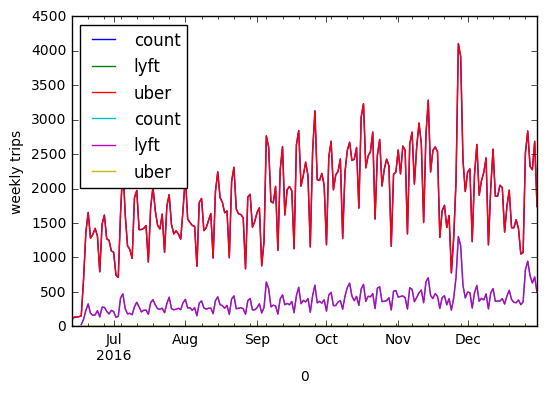

In [55]:
d3=lyfted.resample('d').sum()
d2=ubered.resample('d').sum()
ax = d2.plot()
d3.plot(ax=ax)
plt.ylabel('weekly trips');

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3600).mean()
  if __name__ == '__main__':


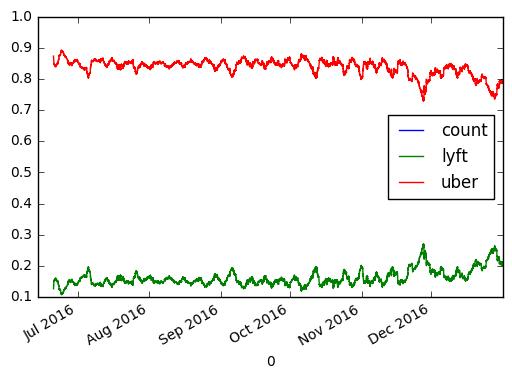

In [72]:
pd.stats.moments.rolling_mean(data, 60*60
                             ).plot();

In [41]:
pivoted = d2.pivot_table(['count'],
                           index=d2.index.date,
                           columns=d2.index.hour,
                           fill_value=0)
pivoted.head()

count                             ...                             \
              0  1  2  3  4  5  6  7  8   9  ...  14  15  16 17  18  19  20   
2016-06-13     0  0  0  0  0  0  0  0  0   0 ...  12  16  10  5  15   6   5   
2016-06-14     6  4  1  2  1  0  2  6  6   8 ...   6   8   9  3  14   8   7   
2016-06-15     3  2  1  0  0  0  1  9  6  10 ...   8  14   9  5   3  13  10   
2016-06-16     4  1  2  0  1  0  2  2  1   8 ...  13   6   8  3  11  13   5   
2016-06-17     0  3  2  1  0  4  1  4  4  12 ...   7  10   8  8  10  12   9   

                        
            21  22  23  
2016-06-13  20   7   5  
2016-06-14   7   6   3  
2016-06-15   7   3   5  
2016-06-16  15   5  14  
2016-06-17  10  14   8  

[5 rows x 24 columns]

In [42]:
X = pivoted.values
X.shape

(202, 24)

In [43]:
from sklearn.decomposition import PCA
Xpca = PCA(0.9).fit_transform(X)
Xpca.shape

(202, 6)

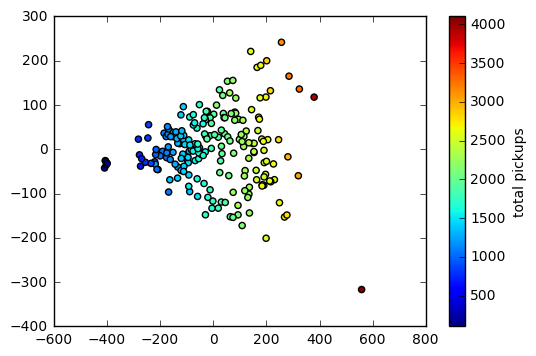

In [44]:
total_trips = X.sum(1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=total_trips)
plt.colorbar(label='total pickups');

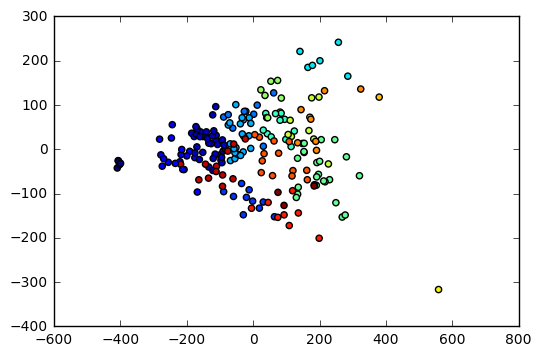

In [45]:
from sklearn.cluster import AffinityPropagation
gmm = AffinityPropagation()
gmm.fit(Xpca)
cluster_label = gmm.fit_predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=cluster_label);

In [46]:
cluster_label

array([ 0,  0,  0,  0,  0,  2,  3,  4,  1,  1,  1,  1,  2,  3,  4,  1,  1,
        2,  2,  2,  2,  3,  7,  5,  1,  1,  2,  3,  4,  1,  1,  1,  1,  2,
        3,  4,  4,  1,  1,  1,  2,  3,  4,  1,  1,  1,  1, 16,  3,  4, 16,
        1,  1,  1,  2,  3,  4,  1,  1,  5,  5,  2,  3,  9,  5,  5,  5,  5,
        2, 15,  4,  5,  5,  5,  5,  2, 15,  5,  1,  5,  5,  5,  2,  1,  8,
        6,  5,  5,  7,  1,  8,  6,  5,  7,  7,  7,  1,  8,  6,  9,  7,  7,
        7,  1,  8,  6,  9,  7,  7,  7,  1,  8,  6,  9,  9,  7,  8,  1,  8,
       10, 10, 10,  8,  8,  5,  8,  6, 10, 10,  8,  8,  5,  8, 10,  9, 10,
        8,  8,  1,  8,  9, 10, 10,  8, 10,  1,  8, 13, 14,  8,  8, 13,  1,
        8, 13, 14, 13,  8, 14, 16, 15,  5, 16, 16,  2,  1, 15, 11, 12, 13,
       14, 15, 14,  1, 15, 13, 14, 14, 14, 14,  1, 15, 13, 14, 14, 14, 14,
       16,  3, 16, 16, 16, 16, 16,  2,  2, 15, 17, 17, 17, 17, 16], dtype=int64)

In [47]:
pivoted['Cluster'] = cluster_label
d2 = d2.join(pivoted['Cluster'], on=d2.index.date)
d2.head()
by_hour = d2.groupby(['Cluster', d2.index.time]).mean()


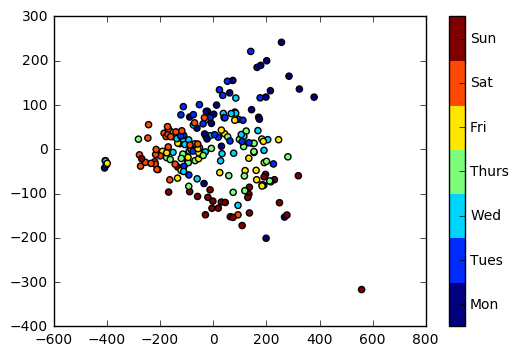

In [48]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

In [ ]:
airport_own=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_June_2015.csv", parse_dates=True, index_col=['TripStartTime'])
airport_own.head()

In [ ]:
airport_own['count']=1

In [ ]:
a2=airport_own.resample('h').sum()
a2.plot()
plt.ylabel('weekly trips');

In [ ]:
airport_own['Duration'].astype(float).plot()

In [ ]:
airport_own.head()